# Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content:
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

# Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #model 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #Save the model in HDD



# Load Dataset

In [2]:
data=pd.read_csv("Admission_Prediction.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

# Data Preprocessing

In [5]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['University Rating'] = data['University Rating'].fillna(data["University Rating"].mode()[0])


In [6]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


# Correlation

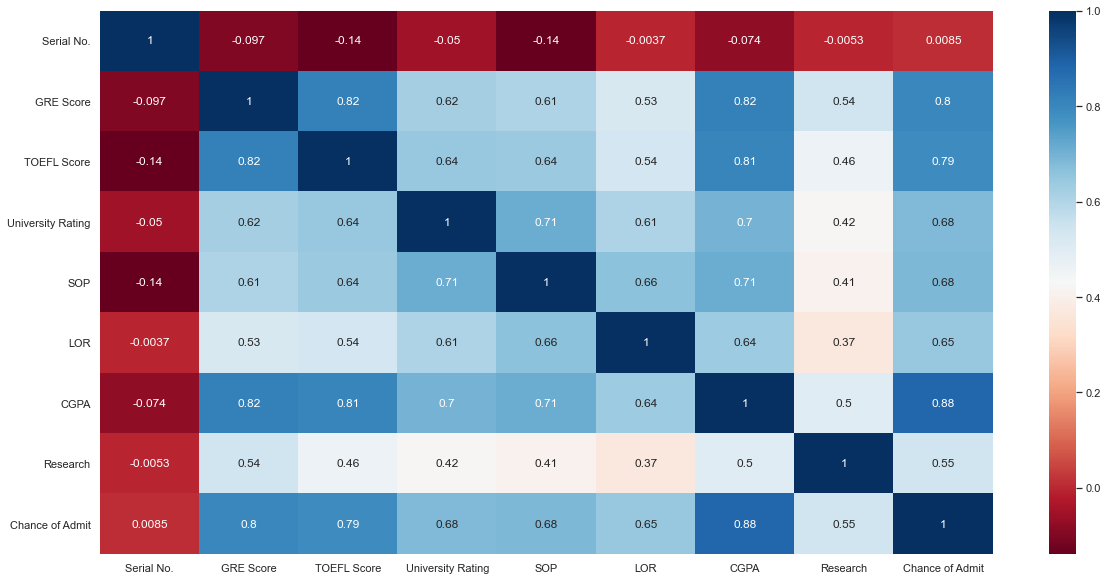

In [8]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data.corr(), cmap="RdBu",annot=True)
plt.show()

# Observations:

1) All columns are correlated with each other excepting Research.

# Skewness plotting

C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

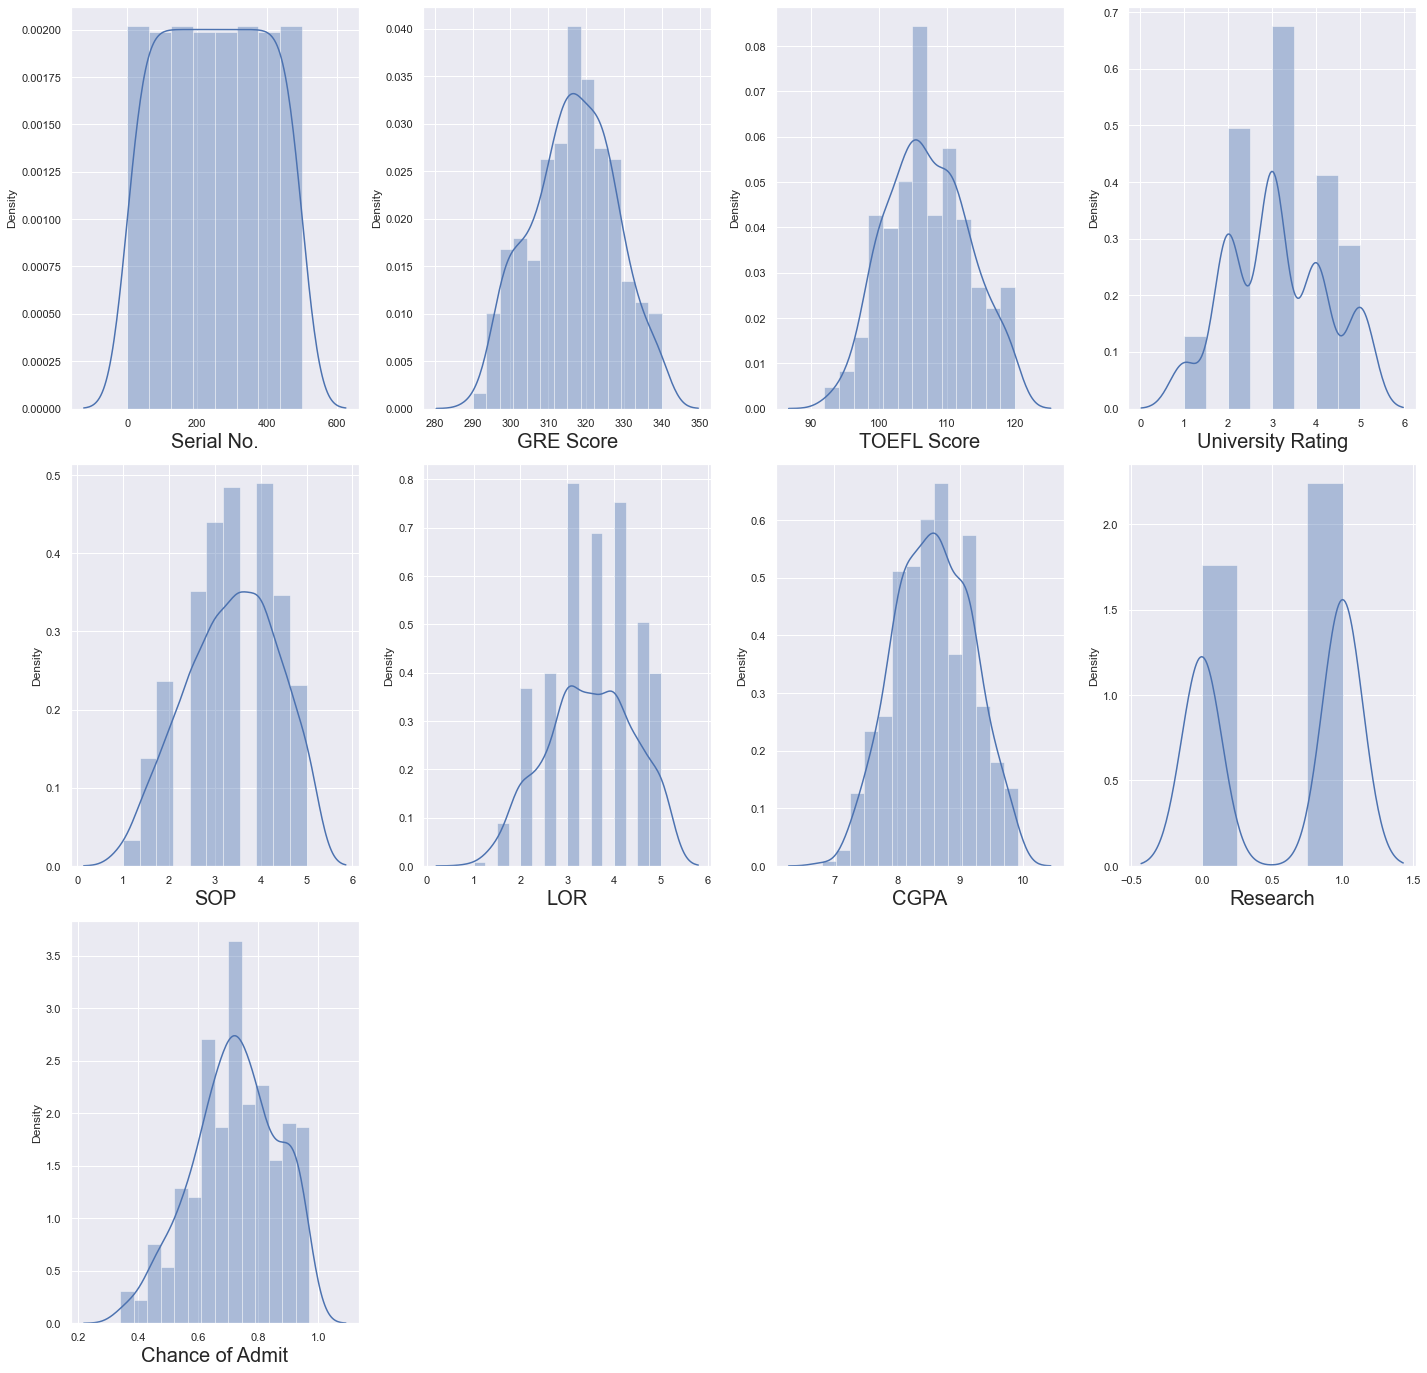

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()


# Observations:

1) all Columns having no skewness.

2) research column shows normal left skewness.

# Features and Target data selection

In [10]:
y=data['Chance of Admit']
X=data.drop(columns=['Chance of Admit',"Serial No."])

# correlation of target variable with each other

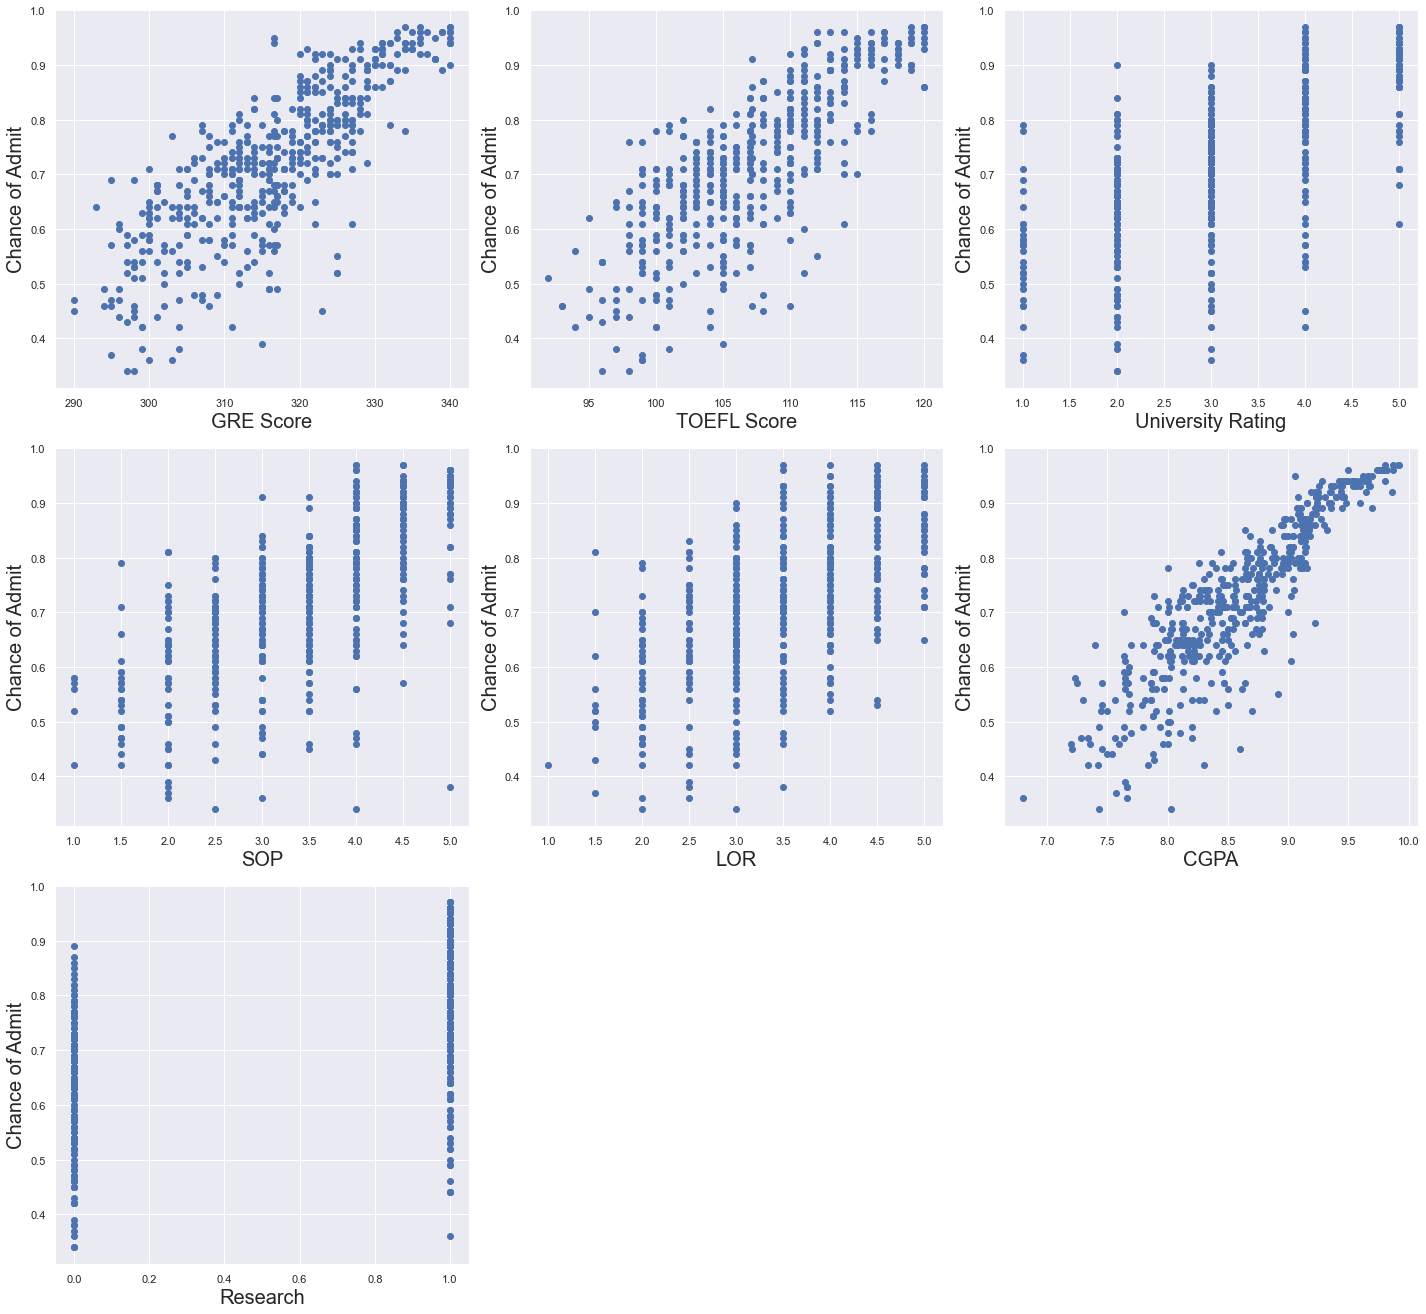

In [11]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=7 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()


# Observation:

1) CGPA, GRE score and TOEFL score are well correlated with the target variable.

# Train-Test-Split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)


# Apply models:
    
1) Linear Regression

2)Ridge Regression

3) Lasso Regression

In [13]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
CV = []
R2_train = []
R2_test = []

def admission_pred(model,model_name):
    # Training model
    model.fit(x_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(x_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(x_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,x_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()


# Linear Regression

Train R2-score : 0.84
Test R2-score : 0.75
Train CV scores : [0.70450649 0.81197953 0.8808961  0.85609258 0.84527499]
Train CV mean : 0.82


C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


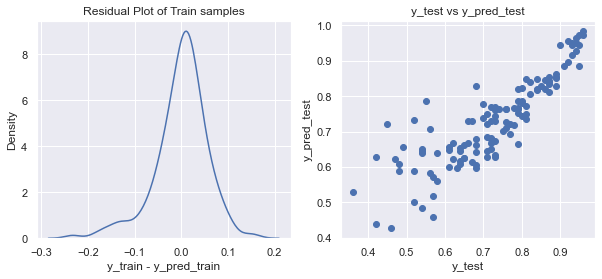

In [14]:
lr = LinearRegression()
admission_pred(lr,"Linear_regressor.pkl")

# Ridge regression

Train R2-score : 0.84
Test R2-score : 0.76
Train CV scores : [0.70443602 0.81270389 0.87993327 0.85764253 0.84255035]
Train CV mean : 0.82


C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


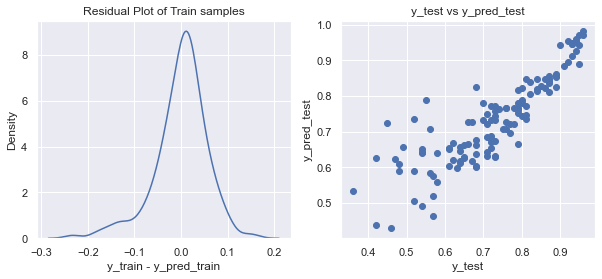

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

admission_pred(rg_rs,"ridge.pkl")

# Lasso Regression

Train R2-score : 0.84
Test R2-score : 0.75
Train CV scores : [0.69494341 0.81802168 0.87780251 0.86554759 0.84182732]
Train CV mean : 0.82


C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


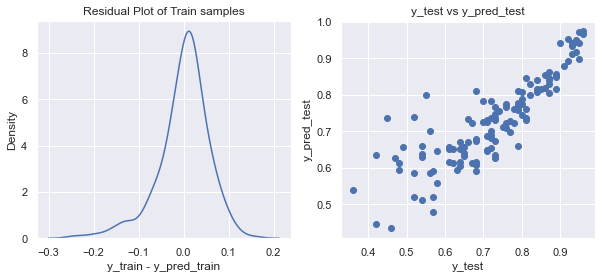

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
admission_pred(ls_rs,"lasso.pkl")

# Accuracy scores of all models

In [17]:
Technique = ["LinearRegression","Ridge","Lasso"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.84,0.75,0.82
1,Ridge,0.84,0.76,0.82
2,Lasso,0.84,0.75,0.82


In [18]:
pd.DataFrame(x_train, columns=["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research"])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
378,303.000000,98.0,1.0,2.0,2.5,7.65,0
23,316.558763,119.0,5.0,5.0,4.5,9.70,1
122,310.000000,106.0,4.0,1.5,2.5,8.36,0
344,295.000000,96.0,2.0,1.5,2.0,7.34,0
246,316.000000,105.0,3.0,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...
51,316.558763,100.0,2.0,1.5,3.5,7.90,1
291,300.000000,102.0,2.0,1.5,2.0,7.87,0
346,304.000000,97.0,2.0,1.5,2.0,7.64,0
130,339.000000,114.0,5.0,4.0,4.5,9.76,1


In [19]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
28,295.0,93.0,1.0,2.0,2.0,7.20,0
382,324.0,110.0,4.0,4.5,4.0,9.15,1
342,308.0,106.0,3.0,3.0,3.0,8.24,0
311,328.0,108.0,4.0,4.5,4.0,9.18,1
212,338.0,120.0,4.0,5.0,5.0,9.66,1
...,...,...,...,...,...,...,...
142,331.0,115.0,5.0,4.0,3.5,9.44,1
446,327.0,118.0,4.0,5.0,5.0,9.67,1
411,313.0,94.0,2.0,2.5,1.5,8.13,0
174,321.0,111.0,4.0,4.0,4.0,8.97,1


# Observation:
    
The accuracy score of linear regression and lasso regression model is same.

accuracy score of ridge regression model is less than other two models.

so we choose linear regression model for prediction.

In [20]:
fm=lr.fit(x_train,y_train)

In [21]:
finalmodel=LinearRegression()

In [22]:
finalmodel.fit(x_train,y_train)

LinearRegression()

In [23]:
import numpy as np
finalmodel.predict([[337.0,118.0,4.0,4.5,4.5,9.65,1]])

array([0.95655226])

# Pickle file

In [24]:
import pickle 
filename = 'admission_model.pk'
pickle.dump(finalmodel, open(filename, 'wb'))

In [25]:
loaded_model1 = pickle.load(open(filename, 'rb'))

In [26]:
loaded_model1.predict([[337.0,118.0,4.0,4.5,4.5,9.65,1]])

array([0.95655226])